<a href="https://colab.research.google.com/github/shubhaankargupta/acmtut/blob/main/ACM_2_ML_Stock_Prediction_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKLEARN LINEAR MODEL

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.animation import FuncAnimation
import imageio
import os

if not os.path.exists('/content/data'):
    os.makedirs('/content/data')

In [55]:
# Step 1: Generate sample data
np.random.seed(42)
m, c = 2, 5
X = np.random.rand(100, 1) * 10  # 100 random points between 0 and 10
y = m * X + c + np.random.randn(100, 1) * 2  # Adding noise

# Step 2: Initialize linear regression model
model = LinearRegression()

frames = []

In [56]:
def animate(i):
    plt.clf()
    model.fit(X[:i + 2], y[:i + 2])  # Incrementally fit the model with more points
    y_pred = model.predict(X)
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, y_pred, color='red', label=f'Predicted line (points={i+2})')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Linear Regression Progress")
    plt.legend()

    # Save frame to list
    plt.savefig(f'/content/data/frame_{i}.png')
    frames.append(imageio.imread(f'/content/data/frame_{i}.png'))

<ipython-input-56-0eb4a65a0f5a>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'/content/data/frame_{i}.png'))
<ipython-input-56-0eb4a65a0f5a>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'/content/data/frame_{i}.png'))
<ipython-input-56-0eb4a65a0f5a>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(i

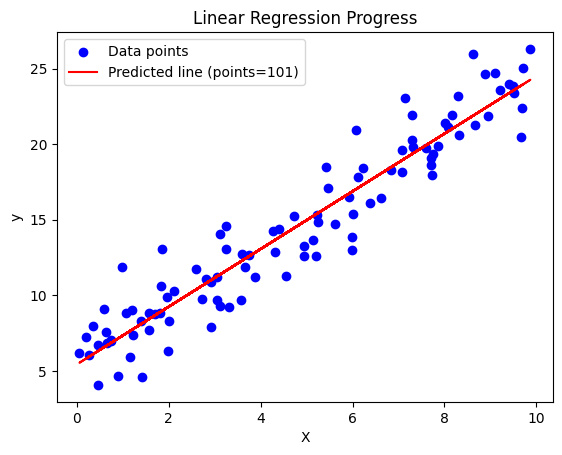

In [57]:
num_frames = len(X)
for i in range(num_frames):
    animate(i)

# Save GIF
gif_path = "/content/data/linear_regression_training.gif"
imageio.mimsave(gif_path, frames, duration=0.05)

In [59]:
x_value = np.array([[100]])  # Replace 7 with any value of x you want

# Predict y for the given x value
predicted_y = model.predict(x_value)

print(f"The predicted value of y for x = {x_value[0][0]} is {predicted_y[0][0]}")

The predicted value of y for x = 100 is 196.23472777263282


# FB PROPHET

## GET DATA WITH YAHOO FINANCE

In [26]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt

# Load AAPL data for the past 5 years
aapl_data = yf.download("AAPL", period="5y")
aapl_data = aapl_data.reset_index()

# Convert 'Date' column to timezone-naive format
aapl_data['Date'] = aapl_data['Date'].dt.tz_localize(None)

# Prepare data for Prophet
aapl_data = aapl_data[['Date', 'Close']]
aapl_data.columns = ['ds', 'y']  # Rename for Prophet compatibility
aapl_data.head()


[*********************100%***********************]  1 of 1 completed


,ds,y
0,2019-11-13,66.117500
1,2019-11-14,65.660004
2,2019-11-15,66.440002
3,2019-11-18,66.775002
4,2019-11-19,66.572502


## Choose how long you want a prediction for

DEBUG:cmdstanpy:input tempfile: /tmp/tmp81dn5mri/_5nq2er9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81dn5mri/5bcnoj7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47128', 'data', 'file=/tmp/tmp81dn5mri/_5nq2er9.json', 'init=/tmp/tmp81dn5mri/5bcnoj7h.json', 'output', 'file=/tmp/tmp81dn5mri/prophet_modelgh0v1oza/prophet_model-20241112211220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:12:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:12:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


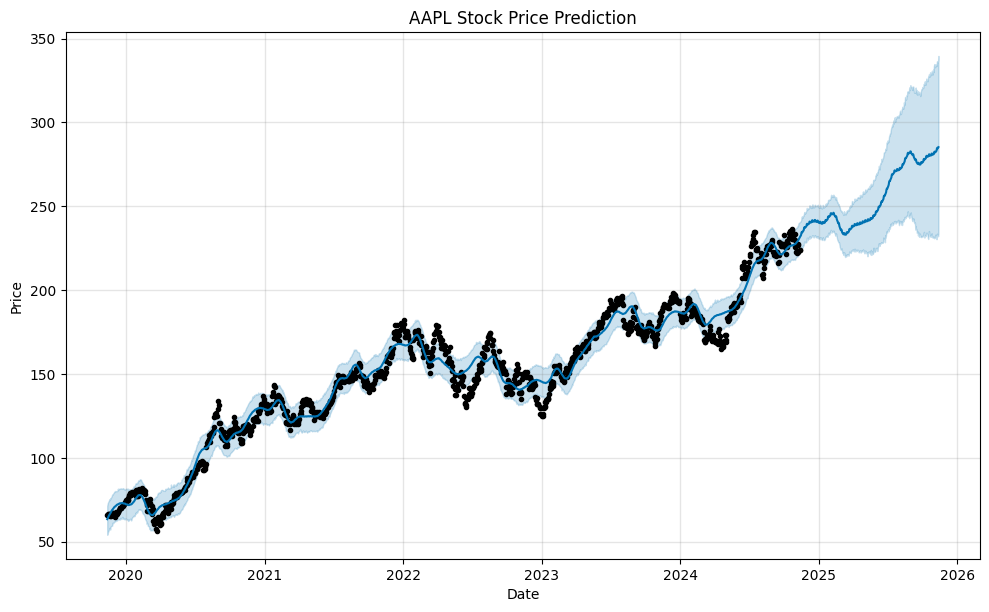

In [27]:
# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(aapl_data)

# Make future dataframe for predictions
future_dates = model.make_future_dataframe(periods=365)  # periods means days
forecast = model.predict(future_dates)

# Plot the historical data and forecast
fig = model.plot(forecast)
plt.title("AAPL Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [93]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-12,63.721900,54.686048,72.558085,63.721900,63.721900,-0.430993,-0.430993,-0.430993,-4.639965,...,-0.194009,-0.194009,-0.194009,4.402980,4.402980,4.402980,0.0,0.0,0.0,63.290906
1,2019-11-13,63.878562,55.142510,72.504422,63.878562,63.878562,-0.165386,-0.165386,-0.165386,-4.639965,...,-0.209566,-0.209566,-0.209566,4.684144,4.684144,4.684144,0.0,0.0,0.0,63.713176
2,2019-11-14,64.035224,55.394974,72.432768,64.035224,64.035224,-0.025828,-0.025828,-0.025828,-4.639965,...,-0.355506,-0.355506,-0.355506,4.969643,4.969643,4.969643,0.0,0.0,0.0,64.009396
3,2019-11-15,64.191886,56.124404,72.501283,64.191886,64.191886,0.335221,0.335221,0.335221,-4.639965,...,-0.281543,-0.281543,-0.281543,5.256728,5.256728,5.256728,0.0,0.0,0.0,64.527107
4,2019-11-18,64.661873,57.416380,75.199737,64.661873,64.661873,1.342338,1.342338,1.342338,-4.639965,...,-0.119367,-0.119367,-0.119367,6.101670,6.101670,6.101670,0.0,0.0,0.0,66.004211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2024-12-17,237.492268,232.084742,250.531088,236.523740,238.238154,3.663818,3.663818,3.663818,-4.639965,...,-0.194009,-0.194009,-0.194009,8.497791,8.497791,8.497791,0.0,0.0,0.0,241.156086
1294,2024-12-18,237.639705,232.340051,249.424207,236.571980,238.461155,3.545642,3.545642,3.545642,-4.639965,...,-0.209566,-0.209566,-0.209566,8.395172,8.395172,8.395172,0.0,0.0,0.0,241.185347
1295,2024-12-19,237.787142,231.429785,249.766457,236.609790,238.652599,3.283757,3.283757,3.283757,-4.639965,...,-0.355506,-0.355506,-0.355506,8.279228,8.279228,8.279228,0.0,0.0,0.0,241.070899
1296,2024-12-20,237.934579,231.868347,250.019569,236.677937,238.851132,3.228150,3.228150,3.228150,-4.639965,...,-0.281543,-0.281543,-0.281543,8.149657,8.149657,8.149657,0.0,0.0,0.0,241.162729


## ENTER DATE AND GET A PREDICTION

In [62]:
# Ask user for a future date
input_date = "2024-12-21" #input("Enter a future date (YYYY-MM-DD) to get the trend: ")

# Convert the input date to a datetime object
input_date = pd.to_datetime(input_date).normalize()

# Check if the date exists in the forecast data
if input_date in forecast['ds'].values:
    trend_value = forecast.loc[forecast['ds'] == input_date, 'trend'].values[0]
    print(f"The trend for {input_date.date()} is: {trend_value:.2f}")
else:
    print("Date out of range or not found in the forecast data. Please choose a date within the forecast range.")

The trend for 2024-12-21 is: 238.39


# RANDOM FOREST REGRESSOR

In [63]:
import yfinance as yf
import pandas as pd

def fetch_stock_data(ticker):
    five_years_ago = pd.Timestamp.now().tz_localize(None) - pd.DateOffset(years=1)
    stock_data = yf.download(ticker, start=five_years_ago)
    return stock_data

aapl_stock_data = fetch_stock_data('AAPL')
aapl_stock_data = aapl_stock_data.tz_localize(None)

[*********************100%***********************]  1 of 1 completed


In [64]:
print(aapl_stock_data.head())

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-11-13  183.899078  184.800003  186.029999  184.210007  185.820007   
2023-11-14  186.526199  187.440002  188.110001  186.300003  187.699997   
2023-11-15  187.093399  188.009995  189.500000  187.779999  187.850006   
2023-11-16  188.785156  189.710007  190.960007  188.649994  189.570007   
2023-11-17  188.765228  189.690002  190.380005  188.570007  190.250000   

Price         Volume  
Ticker          AAPL  
Date                  
2023-11-13  43627500  
2023-11-14  60108400  
2023-11-15  53790500  
2023-11-16  54412900  
2023-11-17  50922700  


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def prepare_data(df):
    df['Date'] = df.index.astype(int) // 10**9  # Convert to seconds since epoch
    X = df[['Date']]
    y = df['Close']
    return X, y

# Define the date five years ago
five_years_ago = pd.Timestamp.now().tz_localize(None) - pd.DateOffset(years=5)  # Making Timestamp timezone-naive
filtered_data = aapl_stock_data[aapl_stock_data.index >= five_years_ago]

# Prepare the data
X, y = prepare_data(filtered_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

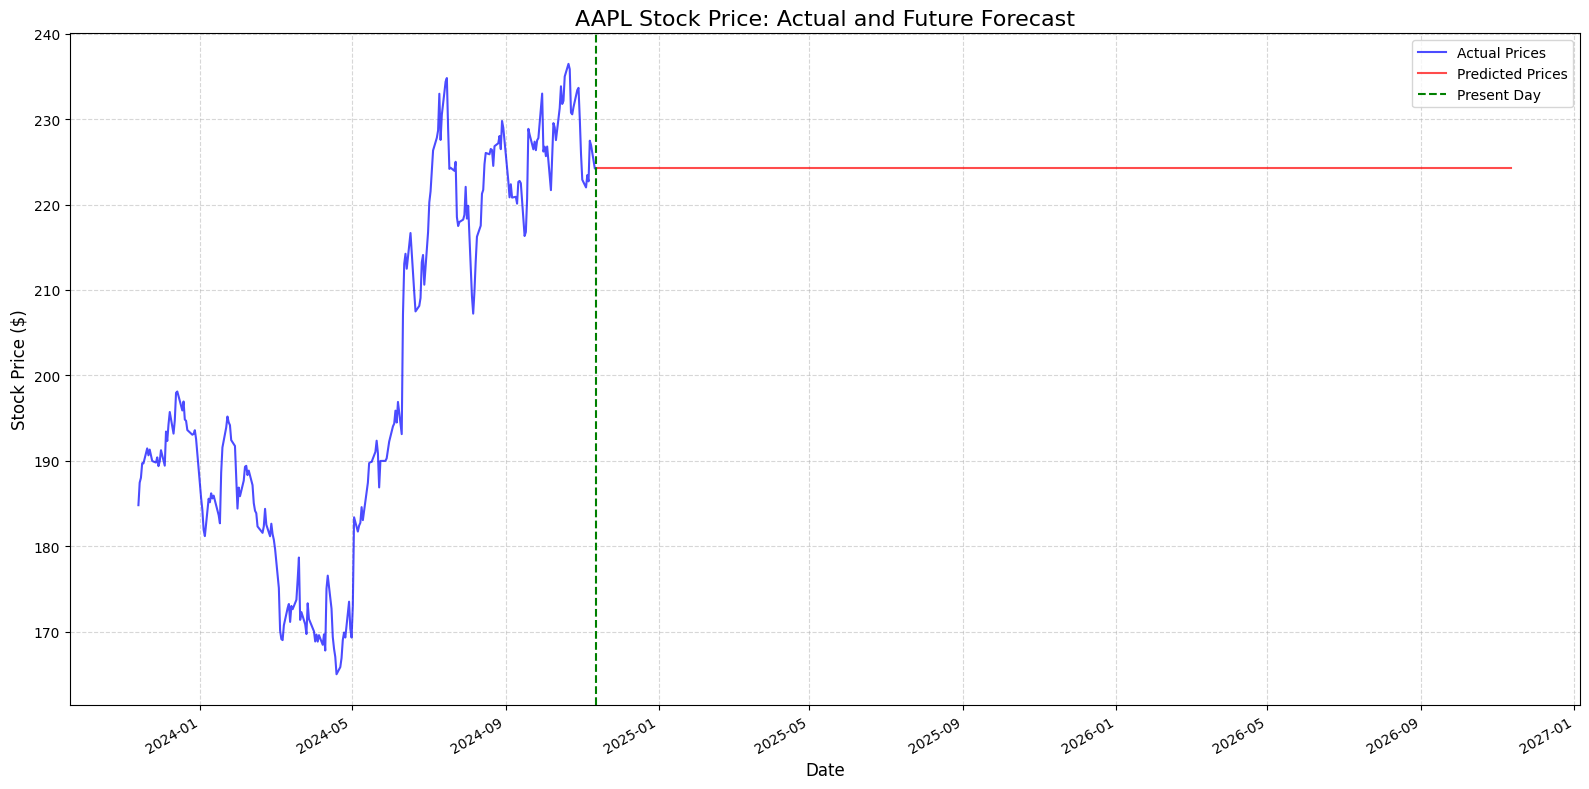

Predicted stock price on 2026-11-12: $224.23


In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta

# Prepare predictions for the existing dataset
X_all = aapl_stock_data.index.astype(int) // 10**9
X_all = X_all.values.reshape(-1, 1)
y_all_pred = model.predict(X_all)

# Generate future dates for the next 2 years
last_date = aapl_stock_data.index[-1]
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=730, freq='D')

# Prepare future dates for prediction
X_future = future_dates.astype(int) // 10**9
X_future = X_future.values.reshape(-1, 1)

# Make predictions for future dates
y_future_pred = model.predict(X_future)

# Combine historical and future dates and predictions
all_dates = np.concatenate([aapl_stock_data.index, future_dates])
all_predictions = np.concatenate([y_all_pred, y_future_pred])

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(aapl_stock_data.index, aapl_stock_data['Close'], color='blue', label='Actual Prices', alpha=0.7)
plt.plot(all_dates[-len(future_dates):], all_predictions[-len(future_dates):], color='red', label='Predicted Prices', alpha=0.7) # Only plot future predictions

# Add a vertical line to separate historical data from future predictions
plt.axvline(x=last_date, color='green', linestyle='--', label='Present Day')

plt.title('AAPL Stock Price: Actual and Future Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Format x-axis to show dates clearly
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# Print the predicted price for the last future date
print(f"Predicted stock price on {future_dates[-1].date()}: ${y_future_pred[-1]:.2f}")

In [67]:
def predict_price(model, date):
    timestamp = pd.to_datetime(date).timestamp()
    prediction = model.predict([[timestamp]])
    return prediction[0]

# Example usage:
user_date = input("Enter a date (YYYY-MM-DD): ")
predicted_price = predict_price(model, user_date)
print(f"Predicted stock price for {user_date}: ${predicted_price:.2f}")

Enter a date (YYYY-MM-DD): 2025-08-08
Predicted stock price for 2025-08-08: $224.23
